![](../src/image/meli3.JPG)

# Entrenamiento, y Modelado y Validacion del Classifier

#### Ya teniendo en nuestro embedding de la data fuente, realizaremos el entrenamiento de 3 modelos de Clasificacion, RandomForest, SVMClassifier y el XGBOOST. para ver cual de ellos nos clasifica mejor.


### Pasos
1. [Preparacion de la data.](#1)
1. [Modelado y entrenamiento](#2)
1. [Validacion](#3)

<a id="1"></a> <br>
# 1. Preparacion de la Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from ast import literal_eval


In [2]:
#Leo los datos ya procesados con los embeddings de 3-small
df_270 = pd.read_csv("./data/data_embedding_270.csv")


In [3]:
df_270["embedding"] = df_270.embedding.apply(literal_eval).apply(np.array)
print(df_270.shape)
df_270.head(2)

(260, 22)


,Unnamed: 0,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,...,url,category_id,category_name,Kmeans,AgC,Siglas_lt,Lt,mix,tokens,embedding
0,0,2024-08-01,acb750cbf4,Closet Armable Organizador De Ropa Metalico Ex...,light_green,14,DS,new,0,5292.0,...,https://articulo.mercadolibre.com.mx/MLM-85145...,FURNITURE,MUEBLES,3.0,3.0,DS,DropShipping,reputation: light_green; Stock: 14; Refurbishe...,40,"[0.0016295177629217505, 0.007548635359853506, ..."
1,1,2024-08-01,0e497a915d,Junta De Carter Mazda 6 3.0 2005,green_silver,4,XD,new,0,400.0,...,https://articulo.mercadolibre.com.mx/MLM-20651...,ACC CARS & VANS,ACCESORIOS PARA AUTOS Y CAMIONETAS,3.0,0.0,XD,Cross Docking,reputation: green_silver; Stock: 4; Refurbishe...,43,"[-0.008773032575845718, -0.005519047379493713,..."


In [4]:
# Separo la data de validacion de la train y test,
df_val=df_270[df_270['Kmeans'].isnull()]
print(df_val.shape)
df_270=df_270[df_270['Kmeans'].isnull()==False]
df_270[df_270['Kmeans'].isnull()] # Valido que ninguno no tengan datos con valores en la etiqueta
df270 = df_270.iloc[np.random.permutation(len(df_270))].reset_index(drop=True)
df_270.head(2)

(10, 22)


,Unnamed: 0,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,...,url,category_id,category_name,Kmeans,AgC,Siglas_lt,Lt,mix,tokens,embedding
0,0,2024-08-01,acb750cbf4,Closet Armable Organizador De Ropa Metalico Ex...,light_green,14,DS,new,0,5292.0,...,https://articulo.mercadolibre.com.mx/MLM-85145...,FURNITURE,MUEBLES,3.0,3.0,DS,DropShipping,reputation: light_green; Stock: 14; Refurbishe...,40,"[0.0016295177629217505, 0.007548635359853506, ..."
1,1,2024-08-01,0e497a915d,Junta De Carter Mazda 6 3.0 2005,green_silver,4,XD,new,0,400.0,...,https://articulo.mercadolibre.com.mx/MLM-20651...,ACC CARS & VANS,ACCESORIOS PARA AUTOS Y CAMIONETAS,3.0,0.0,XD,Cross Docking,reputation: green_silver; Stock: 4; Refurbishe...,43,"[-0.008773032575845718, -0.005519047379493713,..."


In [5]:
# Obtenemos los datos de entrenamiento y de test

x_train,x_test,y_train,y_test = train_test_split(
    list(df_270.embedding.values),df_270.Kmeans,test_size=20,random_state=13
)

df_270['AgC'].value_counts()

AgC
3.0    50
0.0    50
4.0    50
2.0    50
1.0    50
Name: count, dtype: int64

<a id="2"></a> <br>
# 2. Modelado y entrenamiento.

# RANDOM-FOREST - CLASSIFIER

c:\Users\Usuario\anaconda3\envs\openai\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\anaconda3\envs\openai\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\anaconda3\envs\openai\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         4
         1.0       0.00      0.00      0.00         1
         2.0       0.50      0.60      0.55         5
         3.0       0.75      0.67      0.71         9
         4.0       0.00      0.00      0.00         1

    accuracy                           0.60        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.61      0.60      0.60        20



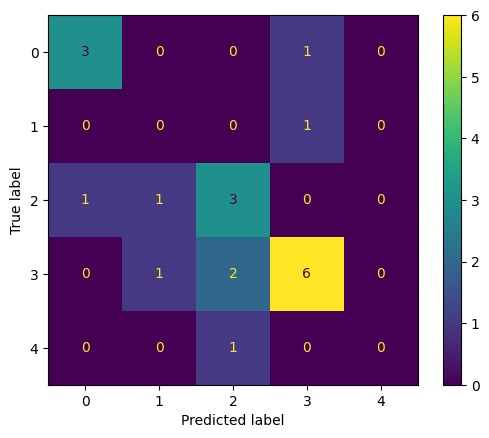

In [6]:
# Modelado, Entrenamiento, Evaluacion
clf = RandomForestClassifier(n_estimators=100) #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones
probas = clf.predict_proba(x_test) #realizamos las probabilidades

report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

## SUPPORT VECTOR MACHINE - CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         4
         1.0       0.00      0.00      0.00         1
         2.0       0.33      0.40      0.36         5
         3.0       0.40      0.44      0.42         9
         4.0       0.00      0.00      0.00         1

    accuracy                           0.45        20
   macro avg       0.30      0.32      0.31        20
weighted avg       0.41      0.45      0.43        20



c:\Users\Usuario\anaconda3\envs\openai\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\anaconda3\envs\openai\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\anaconda3\envs\openai\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

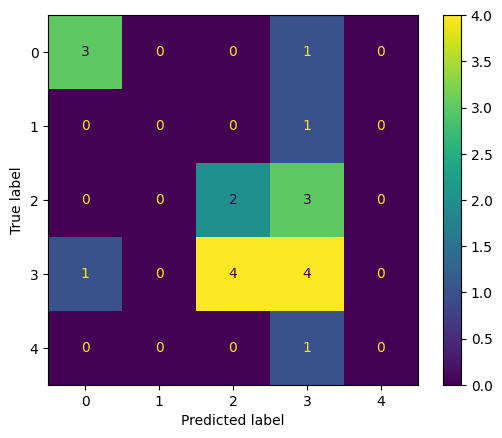

In [8]:
# Modelado, Entrenamiento, Evaluacion
clf = SVC() #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

# XGBOOST - CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.33      0.50      0.40         4
         1.0       0.25      1.00      0.40         1
         2.0       0.40      0.40      0.40         5
         3.0       0.75      0.33      0.46         9
         4.0       0.00      0.00      0.00         1

    accuracy                           0.40        20
   macro avg       0.35      0.45      0.33        20
weighted avg       0.52      0.40      0.41        20



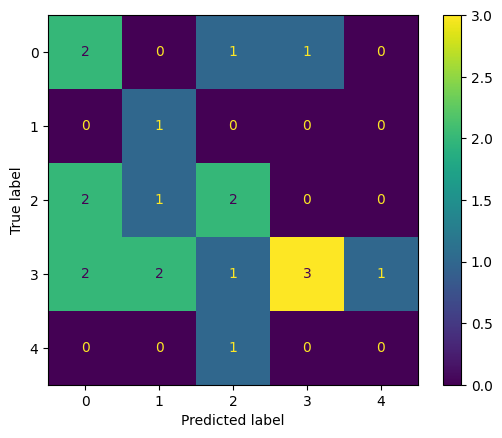

In [9]:
# Modelado, Entrenamiento, Evaluacion
clf = XGBClassifier() #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

<a id="3"></a> <br>
# 3. Validacion